K=1, Accuracy=1.0000
K=3, Accuracy=1.0000
K=5, Accuracy=1.0000
K=7, Accuracy=1.0000
K=9, Accuracy=1.0000
K=11, Accuracy=1.0000
K=13, Accuracy=1.0000


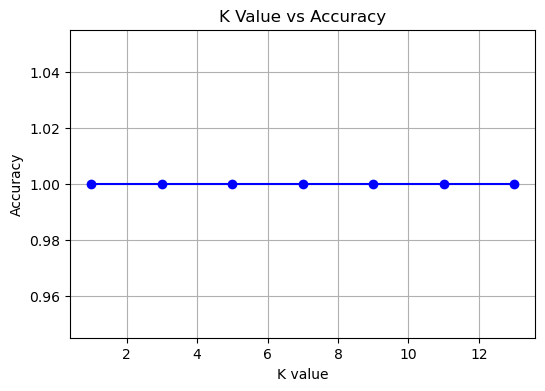

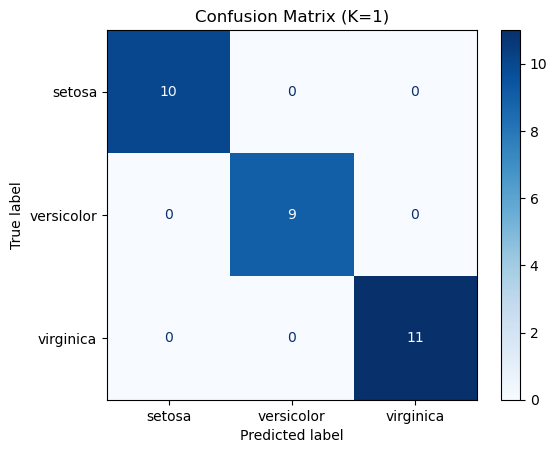

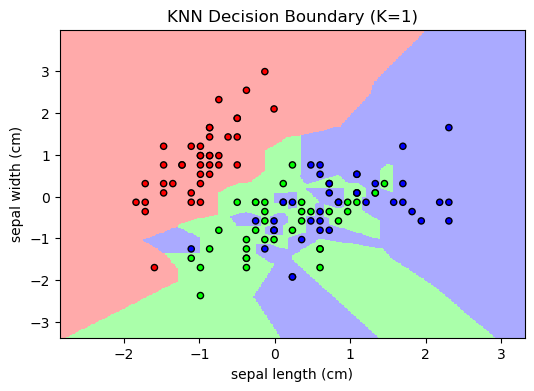

In [2]:
# Task 6: KNN Classification 
# Author: [Mukesh sai]

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Suppress future warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# 1. Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame so that it's easier to inspect (optional)
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# 2. Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train & Test for different K values
k_values = [1, 3, 5, 7, 9, 11, 13]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

# 5. Plot K vs Accuracy
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title('K Value vs Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 6. Best K model & Confusion Matrix
best_k = k_values[np.argmax(accuracies)]
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

# 7. Optional: Visualize decision boundary for first 2 features
def plot_decision_boundaries(X, y, model, title):
    X = X[:, :2]  # only first 2 features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(6,4))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Plot for training data
plot_decision_boundaries(X_train, y_train,
                         KNeighborsClassifier(n_neighbors=best_k),
                         f"KNN Decision Boundary (K={best_k})")
